0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Finished Training. 
 MSE: 9.014449851423674
Expected 1
Guess 4
Test Accuracy: 0.0
Test MSE = 10.530205940332795
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Finished Training. 
 MSE: 9.0427758715304
Expected 6
Guess 8
Test Accuracy: 0.0
Test MSE = 14.283503338889103
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
3

18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Finished Training. 
 MSE: 9.316478051905937
Expected 6
Guess 8
Test Accuracy: 0.0
Test MSE = 11.873063330656786
0
Finished Training. 
 MSE: 0.009838803561903416
Expected 6
Guess 8
Test Accuracy: 0.0
Test MSE = 1.7696885629469756
0
Finished Training. 
 MSE: 0.009997695775246796
Expected 5
Guess 7
Test Accuracy: 0.0
Test MSE = 0.990852110779006
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Finished Training. 
 MSE: 0.009999596087842672
Expected 4
Guess 1
Test Accuracy: 0.0
Test MSE = 1.4748544928692797
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Finished Train

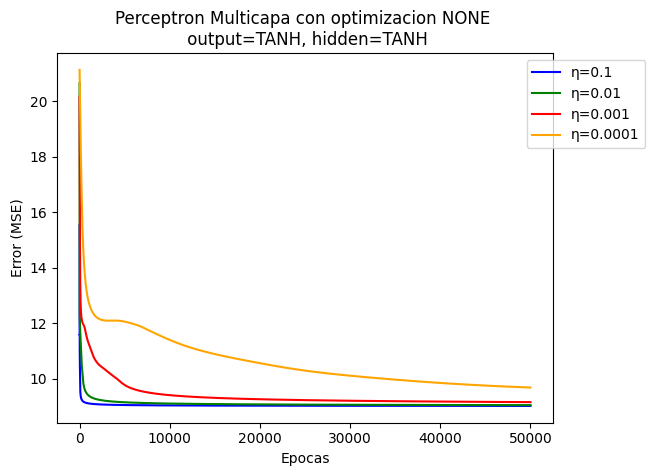

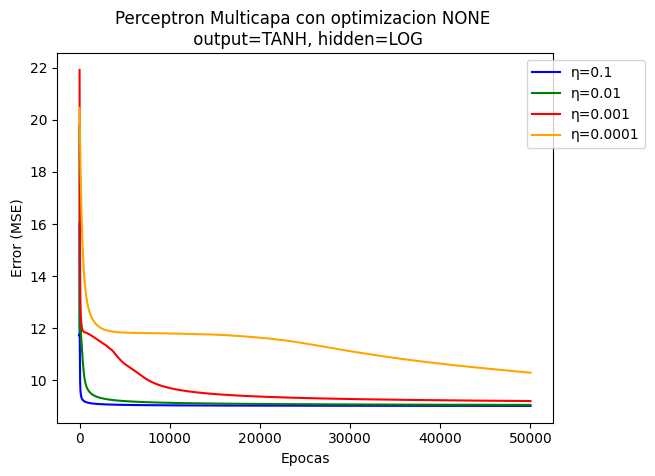

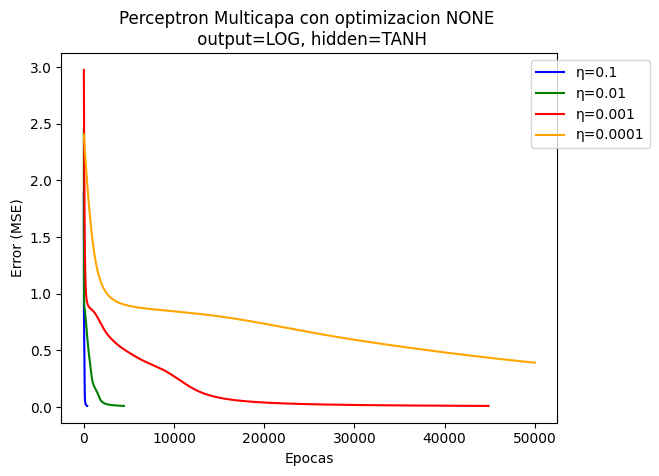

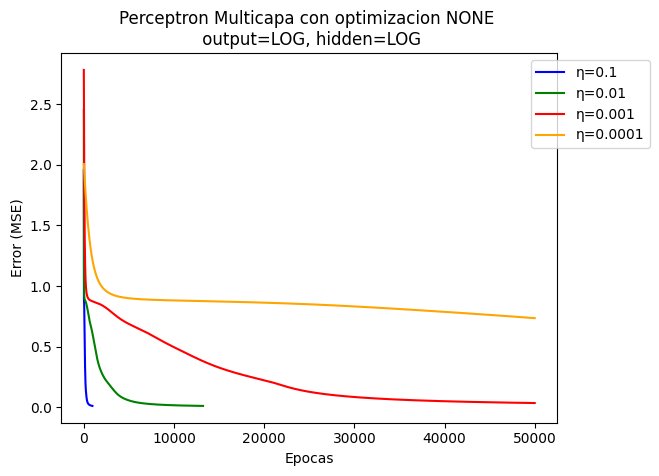

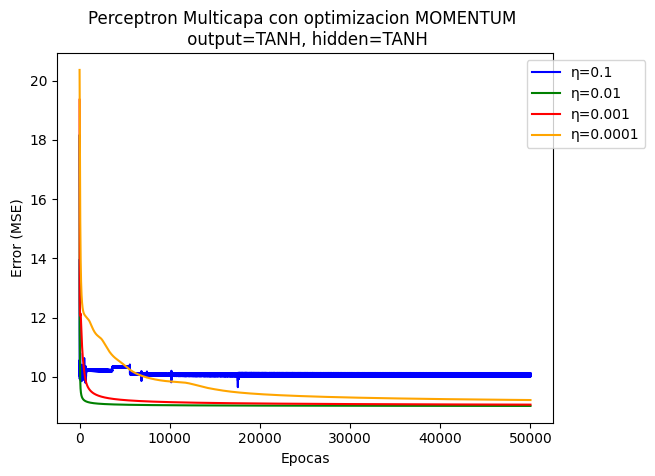

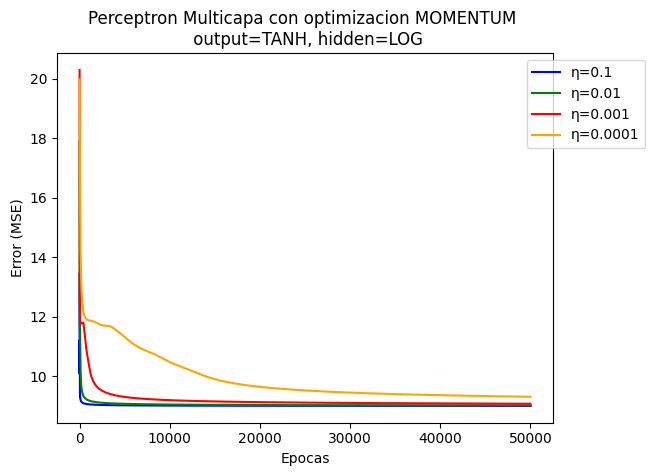

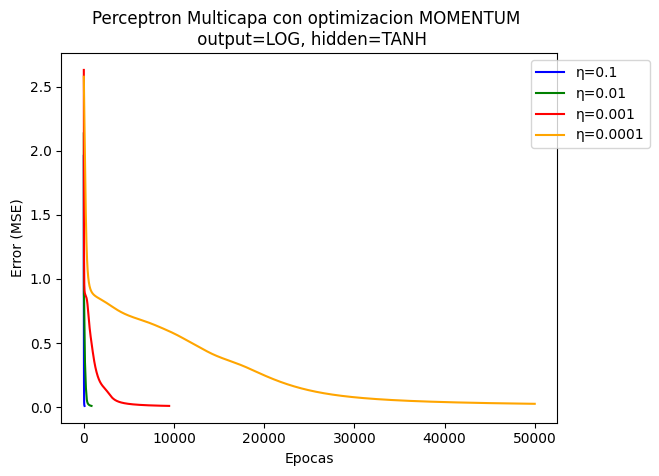

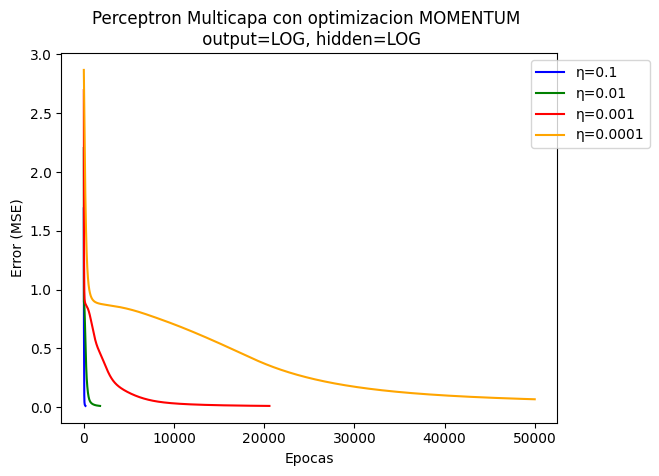

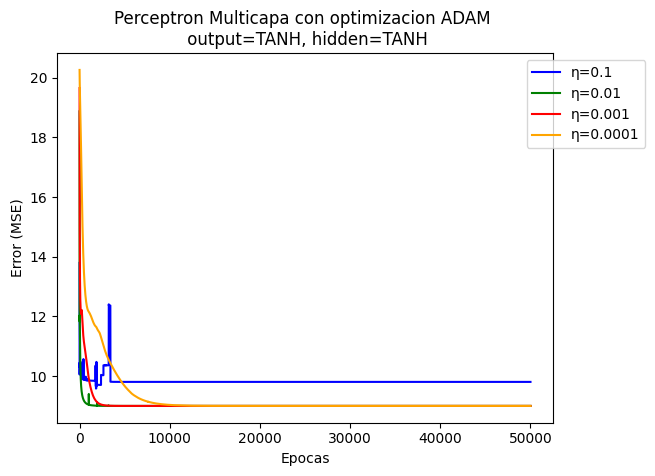

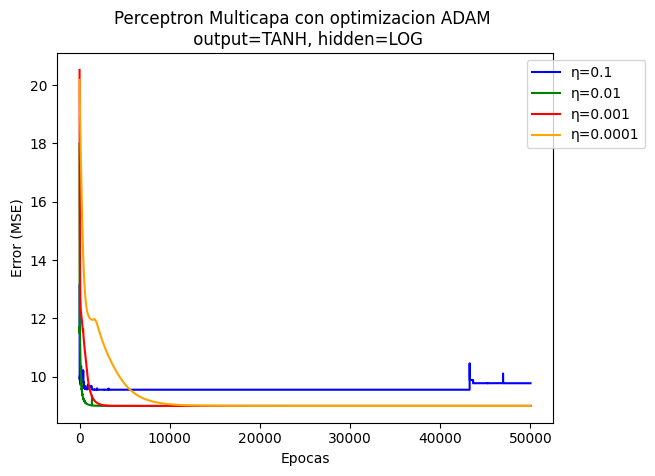

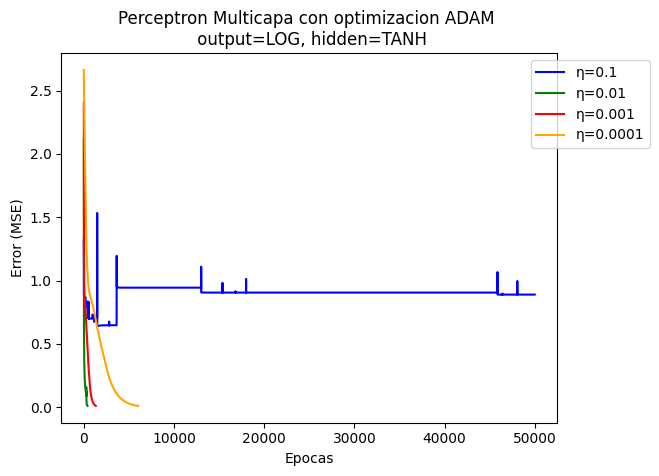

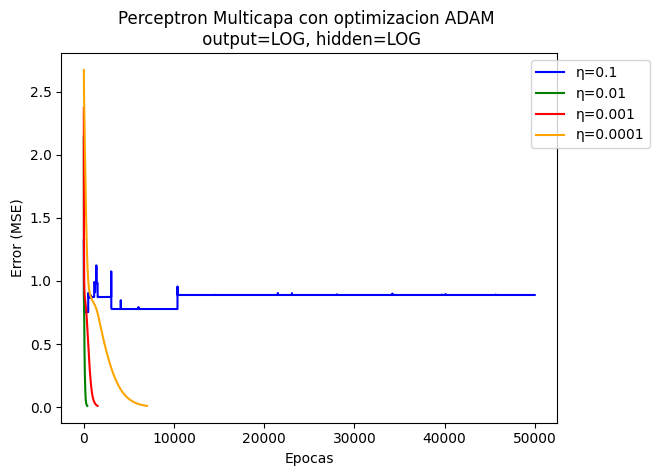

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import parse_nums
from src.perceptron import MultilayerPerceptron

PATH = "./data/Ej3B-digitos.txt"

OUTPUT_ACTIVATION = ["TANH", "LOG"]
HIDDEN_ACTIVATION = ["TANH", "LOG"]
BETA = 1

TRAINING_TYPE = ["PERCENTAGE", "K-FOLD"]
LR = 0.1
BIAS = 1
EPOCHS = 50000
MIN_ERROR = 0.01
TRAINING_PERCENTAGE = 0.9

QTY_HIDDEN_LAYERS = 1
QTY_NODES_IN_HIDDEN_LAYERS = [6]

OPTIMIZER_METHOD = ["NONE", "MOMENTUM", "ADAM"]
K_FOLD = 4
ALPHA = 0.8
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8

input_data, expected_data = parse_nums(PATH, 7, 3)

#-------------------------------------------------
# VARIANDO EL LEARNING RATE
#-------------------------------------------------

arr_of_errors = []
arr_of_epochs = []
lrs = [round(LR*(10**(-i)),4) for i in range(4)]

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for out_act in OUTPUT_ACTIVATION:
        arr_of_error_aux2 = []
        arr_of_epochs_aux2 = []
        for hidden_act in HIDDEN_ACTIVATION:
            arr_of_error_aux3 = []
            arr_of_epochs_aux3 = []
            for lr in lrs:
                perceptron = MultilayerPerceptron(input_data, expected_data, lr, BIAS,
                                                EPOCHS, TRAINING_TYPE[0], TRAINING_PERCENTAGE, K_FOLD, MIN_ERROR,
                                                QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                                out_act, hidden_act, BETA,
                                                opt_method, ALPHA, BETA1, BETA2, EPSILON, expected_data)
                mse_errors, total_epochs, acurracy, test_mse = perceptron.train()
                arr_of_error_aux3.append(mse_errors)
                arr_of_epochs_aux3.append(total_epochs)

            arr_of_error_aux2.append(arr_of_error_aux3)
            arr_of_epochs_aux2.append(arr_of_epochs_aux3)

        arr_of_error_aux.append(arr_of_error_aux2)
        arr_of_epochs_aux.append(arr_of_epochs_aux2)

    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange']

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    for j, out_act in enumerate(OUTPUT_ACTIVATION):
        for k, hidden_act in enumerate(HIDDEN_ACTIVATION):
            for s in range(len(arr_of_errors[i][j][k])):
                plt.plot(range(arr_of_epochs[i][j][k][s]), arr_of_errors[i][j][k][s], color=colors[s], label=f"η={lrs[s]}")
            plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={out_act}, hidden={hidden_act}')
            plt.xlabel("Epocas")
            plt.ylabel("Error (MSE)")
            plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
            plt.show()
       